In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import re
%matplotlib inline

In [5]:
with open("training_set.json") as datafile:
  data_training = json.load(datafile)
training_set = pd.DataFrame(data_training)

with open("testing_set.json") as datafile:
  data_testing = json.load(datafile)
testing_set = pd.DataFrame(data_testing)

In [6]:
training_set.head(10)

,intent,sentence
0,irrelevant,"850€ maximum pour le loyer, à partir de janvie..."
1,irrelevant,D'imprimer
2,purchase,Le meilleur cabriolet hybrid moins de 5m10 min...
3,find-hotel,en ce moment je cher un location pour les vaca...
4,irrelevant,c'est possible de t'utiliser la nuit ?
5,irrelevant,J'ai besoin d'acheter un fusil
6,irrelevant,Vous pouvez réserver pour 09h oui
7,irrelevant,Du 20 au 22 novembre pour 100-150 euros la nuit
8,purchase,Mon docteur m'a suggéré de porter des bandes p...
9,purchase,Commande à effectuer : 30 bloc note petits car...


In [7]:
testing_set.head(10)

,intent,sentence
0,irrelevant,Tu sais où je peux acheter un bazooka ?
1,irrelevant,déco de maison style maison ferret
2,irrelevant,j'ai envie qu'on se rencontre
3,purchase,J’ai besoin de fleurs pr ma grand mère
4,find-restaurant,trouve à champigny-sur-marne où manger de la c...
5,irrelevant,Réécoutez
6,find-train,trouve-moi un billet de train demain pour Angers
7,irrelevant,"idiwii, Logement avec cuisine"
8,irrelevant,Il faudrait que tu me fasses un devis pour le ...
9,irrelevant,"Pas du tout, c'est le sf de valthorens"


In [8]:
training_set.describe()

,intent,sentence
count,6035,6035
unique,8,6035
top,irrelevant,L'adresse du meilleur resto japonais ?
freq,3852,1


In [9]:
testing_set.describe()

,intent,sentence
count,1065,1065
unique,8,1064
top,irrelevant,Est ce que tu connais des sites internet sur l...
freq,677,2


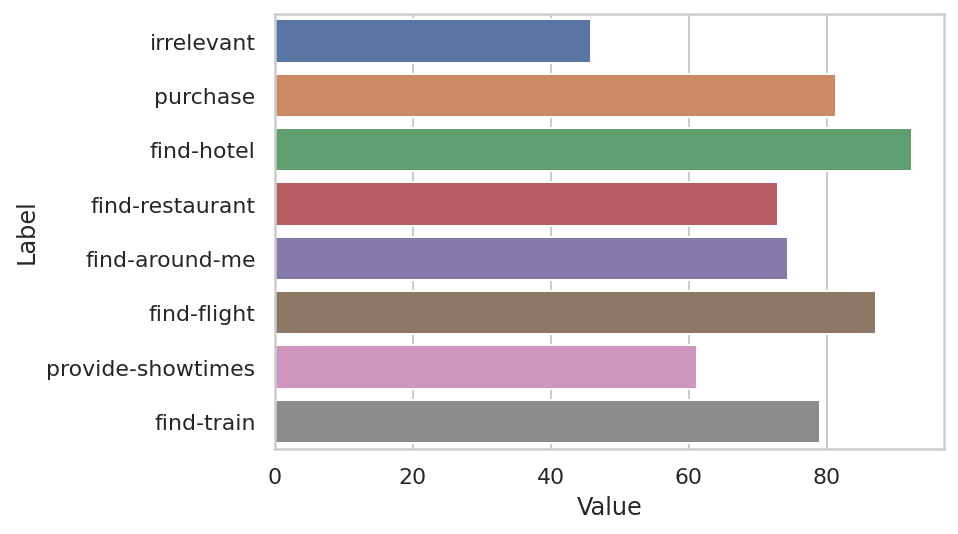

In [10]:

def create_occurences_dict(data):
    occurences_of_classes = {}
    for i in range (len(data)):
        if data[i]["intent"] in occurences_of_classes:
            occurences_of_classes[data[i]["intent"]] += 1 #sans doute récupérable plus simplement, à factoriser
        else :
            occurences_of_classes[data[i]["intent"]] = 1
    return occurences_of_classes


def mean_letters_per_class(data):
    letters_p_classes = {}
    occurences_of_classes = create_occurences_dict(data)
    for i in range (len(data)):
        if data[i]["intent"] in letters_p_classes:
            letters_p_classes[data[i]["intent"]] += len(data[i]["sentence"])
        else :
            letters_p_classes[data[i]["intent"]] = len(data[i]["sentence"])

    for i in letters_p_classes:
        letters_p_classes[i] = letters_p_classes[i]/occurences_of_classes[i]

    return letters_p_classes

def plot_dictionnary(dict_to_show):
    sns.set_theme(style="whitegrid")
    data = pd.DataFrame({'Value': list(dict_to_show.values()), 'Label': list(dict_to_show.keys())})
    ax = sns.barplot(y = "Label", x = "Value", data=data)
    """
    fig = plt.figure()
    ax = fig.add_axes([0,0,2,2])
    ax.bar(dict_to_show.keys(),dict_to_show.values())
    plt.show()"""

plot_dictionnary(mean_letters_per_class(data_training))

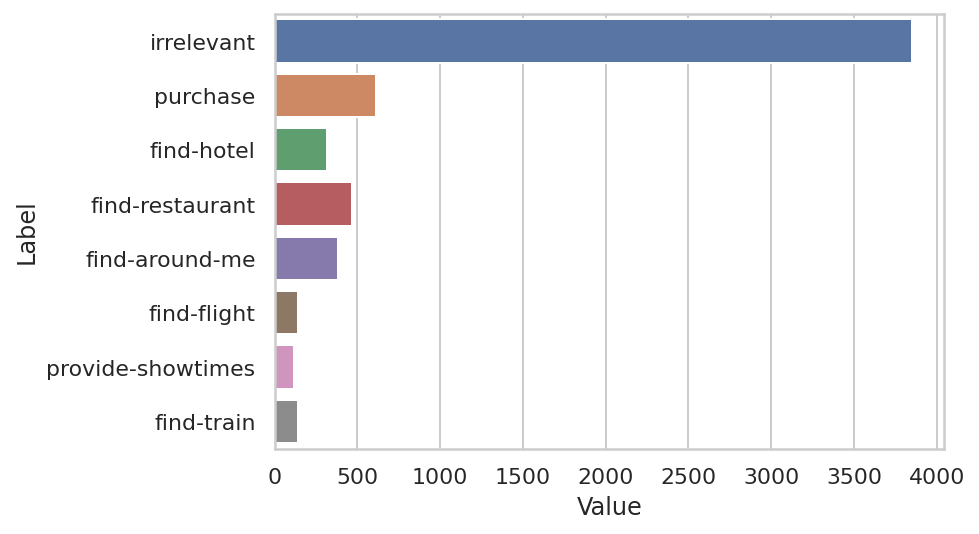

In [12]:
plot_dictionnary(create_occurences_dict(data_training))

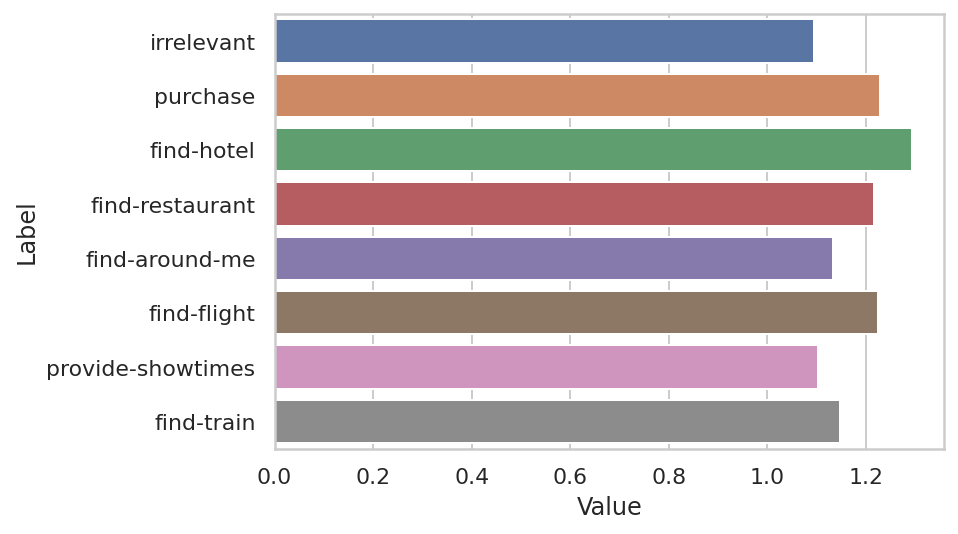

In [42]:
def mean_utterances_per_class(data):
    occurences_of_classes = create_occurences_dict(data)
    utterances_of_classes = {}

    for i in range (len(data)):
        if data[i]["intent"] in utterances_of_classes:
            utterances_of_classes[data[i]["intent"]] += len(re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s',data[i]["sentence"]))
        else :
            utterances_of_classes[data[i]["intent"]] = len(re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s',data[i]["sentence"]))


    for i in utterances_of_classes:
        utterances_of_classes[i] = utterances_of_classes[i]/occurences_of_classes[i]
    return utterances_of_classes

plot_dictionnary(mean_utterances_per_class(data_training))

In [43]:
#Test à mettre dans un autre fichier plus tard car on peut pas le faire sur cocalc :(
import unittest
class GraphTest(unittest.TestCase):
    def test_create_occurence_dict(self):
        self.assertEqual(create_occurences_dict(data_testing),{"irrelevant": 677, "purchase":114, "find-hotel":55, "find-restaurant":93, "find-around-me":67, "find-flight":24, "provide-showtimes": 14, "find-train": 21 })
    def test_mean_letters_per_class(self):
        self.assertEqual(mean_letters_per_class(data_testing[0:1]),{"irrelevant": 39})
    def test_mean_utterances_per_class(self):
        self.assertEqual(mean_utterances_per_class(data_testing[0:1]),{"irrelevant": 1})


In [44]:
    unittest.main(argv=['first-arg-is-ignored'], exit=False)



.

.

.


----------------------------------------------------------------------
Ran 3 tests in 0.003s

OK
